In [1]:
# put absolute path here
DATA_DIR = r"C:\Users\User\Downloads\saos-dump-23.02.2018.tar\saos-dump-23.02.2018\data\json"

In [2]:
# making usage of my helper .py file in jupyter environment on any computer
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from file_utils import *
data_manager = DataManager(DATA_DIR)

In [3]:
# Actual homework starts here
import re
generator = data_manager.judgments_generator(year=2009)

In [4]:
forms_mapping = {}    

with open(r"C:\Users\User\Downloads\polimorfologik-2.1\polimorfologik-2.1.txt", encoding="utf8") as f:
    for line in f.readlines():
        splitted = line.split(";") 
        forms_mapping[splitted[1].lower()] = splitted[0] 

In [5]:
def contain_digit(x):
    return re.search(r'\d', x) is not None

def is_roman_number(x):
    match = re.match(r'[ivxlcdm]+', x, re.IGNORECASE)
    if match is not None:
        return match.group(0) == x
    return False

def remove_html(x):
    return re.sub("<[^>]*>", "", x)

def remove_linebreaks(x):
    return re.sub("-\n", "", x)

In [6]:
from collections import defaultdict
frequency_dict = defaultdict(int)
forms_merged_dict = defaultdict(int)
not_recognized = defaultdict(int)

while True:
    try:
        content = generator.__next__()
        text = remove_linebreaks(remove_html(content["textContent"]))
        for match in re.findall(r'\b\w+\b', text, re.UNICODE):
            if not contain_digit(match) and not is_roman_number(match):
                match = match.lower()
                if match in forms_mapping.keys():
                    base_form = forms_mapping[match]
                else:
                    base_form = match
                    not_recognized[match] += 1
                
                forms_merged_dict[base_form] += 1 
                frequency_dict[match] += 1
    except StopIteration:
        break

In [7]:
import codecs

import operator
sorted_dict = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)   
the_file = codecs.open('frequency_list.txt','w','utf-8')
for word_count in sorted_dict:
    the_file.write('%s:%d\n' % (word_count[0], word_count[1]))

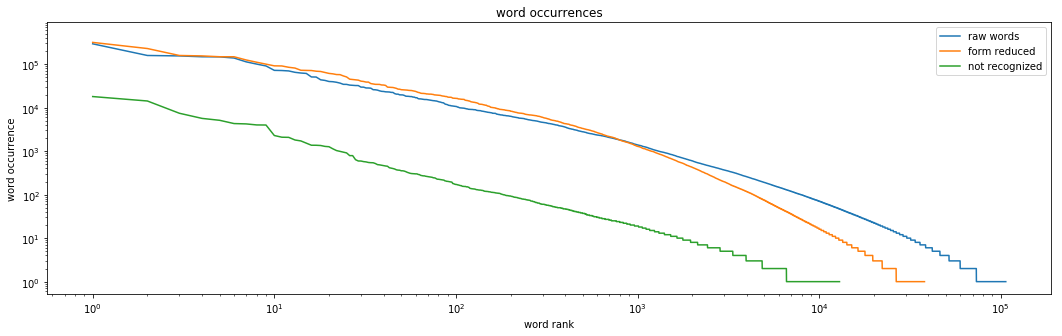

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,5))

counts = [count for (word, count) in sorted_dict]
words = [x for x in range(len(counts))]
plt.plot(words, counts, label='raw words')
  
forms_sorted = sorted(forms_merged_dict.items(), key=lambda x: x[1], reverse=True)  
counts = [count for (word, count) in forms_sorted]
words = [x for x in range(len(counts))]
plt.plot(words, counts, label='form reduced')

not_recognized_sorted = sorted(not_recognized.items(), key=lambda x: x[1], reverse=True)  
counts = [count for (word, count) in not_recognized_sorted]
words = [x for x in range(len(counts))]
plt.plot(words, counts, label='not recognized')

plt.title('word occurrences')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('word rank')
plt.ylabel('word occurrence')
plt.legend()
print("")

In [9]:
some_not_recognized_words = [x for x in not_recognized_sorted[:30] if len(x[0]) > 1]
some_not_recognized_words

[('pzp', 22323),
 ('siwz', 17948),
 ('sygn', 14196),
 ('uzp', 7419),
 ('zw', 5651),
 ('otk', 4300),
 ('ssn', 4220),
 ('zu', 3980),
 ('sk', 2284),
 ('osnc', 2088),
 ('csk', 2072),
 ('sa', 1802),
 ('późn', 1715),
 ('czp', 1521),
 ('ppkt', 1363),
 ('niepubl', 1346),
 ('lex', 1284),
 ('ckn', 1262),
 ('publ', 988),
 ('cnp', 953),
 ('osnp', 910),
 ('pln', 788),
 ('zd', 788),
 ('uk', 636),
 ('zo', 593)]

In [10]:
def edits(word):
    letters    = 'abcdefghijklmnopqrstuvwxyz' + 'ąęśćźżłńó'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): return (e2 for e1 in edits(word) for e2 in edits(e1))
def recognized(words): return set(w for w in words if w in forms_mapping.keys())

for (word, count) in some_not_recognized_words:
    fixes = (sorted(recognized(edits(word)), key=lambda x: frequency_dict[x], reverse=True) 
             or sorted(recognized(edits2(word)), key=lambda x: frequency_dict[x], reverse=True))

    best_fix = "NONE" if not fixes else fixes[0]
    print("%s %d ---> %s %d" % (word, count, best_fix, frequency_dict[best_fix]))

pzp 22323 ---> pkp 464
siwz 17948 ---> siw 13
sygn 14196 ---> syn 73
uzp 7419 ---> uz 149
zw 5651 ---> w 477616
otk 4300 ---> tk 3761
ssn 4220 ---> sn 2778
zu 3980 ---> z 292526
sk 2284 ---> k 61061
osnc 2088 ---> osób 5194
csk 2072 ---> ck 747
sa 1802 ---> na 157818
późn 1715 ---> późno 61
czp 1521 ---> czy 13517
ppkt 1363 ---> pkt 36595
niepubl 1346 ---> niepudle 0
lex 1284 ---> lek 116
ckn 1262 ---> cen 1604
publ 988 ---> pub 5
cnp 953 ---> np 3331
osnp 910 ---> osp 257
pln 788 ---> pn 783
zd 788 ---> z 292526
uk 636 ---> k 61061
zo 593 ---> z 292526
